### Linear Regression - Predicting Brain Weight

In [35]:
#Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [36]:
#Reading The Data Into A DataFrame
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [37]:
#Dimensions Of The Dataset
data.shape

(237, 4)

In [38]:
#Collecting X And Y variables From The Dataset
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [41]:
#Calculating Mean Of X And Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Length Of The Dataset
length = len(X)

numerator = 0
denominator = 0

for i in range(length):
    numerator += (X[i]-mean_x)*(Y[i]-mean_y)
    denominator += (X[i]-mean_x) ** 2

#Slope Of The Line    
m = numerator/denominator

#Intercept Of The Line
c = mean_y - (m*mean_x)

print("Coefficients Of The Line, Slope:{0}, Intercept: {1}".format(m,c))

Coefficients Of The Line, Slope:0.26342933948939945, Intercept: 325.57342104944223


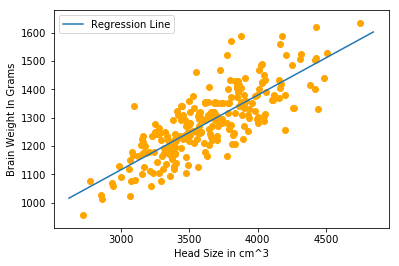

In [31]:
#Plotting Values And Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = m*x + c

#Plotting Line
plt.plot(x,y, label ='Regression Line')

#Plotting Scatter Points
plt.scatter(X,Y, color='orange')
plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight In Grams')
plt.legend()

In [42]:
#Calculating The Value Of R^2

numerator = denominator = 0

for i in range(length):
    y_pred = m*X[i] + c
    numerator += (y_pred - mean_y) ** 2
    denominator += (Y[i] - mean_y) ** 2
    
numerator/denominator    

0.63931171995700009

In [52]:
regressor = LinearRegression()
X = X.reshape((length,1))
regressor.fit(X,Y)

y_pred = regressor.predict(X)
y_pred

regressor.score(X,Y)

0.63931171995699998